In [123]:
import pandas as pd
import numpy as np

In [124]:
df = pd.read_csv('Reviews.csv',encoding="utf8")
df = df.sample(frac=1, random_state=10)

In [125]:
df.head()

,category,rating,label,text_
26860,Kindle_Store_5,5.0,OR,I apologize for my preconceived notions! I hon...
24031,Kindle_Store_5,4.0,OR,I didn't think I would have enjoyed this serie...
766,Home_and_Kitchen_5,3.0,OR,Delivery was exactly as expected. Bowls were ...
23683,Pet_Supplies_5,3.0,OR,I am a full time dog trainer and I ordered thi...
32291,Books_5,4.0,CG,I am Charlotte Simmons is a real professional ...


In [126]:
len(df)

40432

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40432 entries, 26860 to 17673
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [148]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['rating'] != 3.0]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['rating'] > 3.0, 1, 0)

#> greater than 3, become 1 and 0

In [149]:
df.head(20)

,category,rating,label,text_,Positively Rated
24031,Kindle_Store_5,4.0,OR,I didn't think I would have enjoyed this serie...,1
32291,Books_5,4.0,CG,I am Charlotte Simmons is a real professional ...,1
37253,Clothing_Shoes_and_Jewelry_5,4.0,OR,My son is happy with it a very comfortable fit...,1
993,Home_and_Kitchen_5,4.0,CG,Very solid built and appears to be well made.V...,1
35010,Toys_and_Games_5,2.0,CG,Quick lil bugger. Controls are easy to follow ...,0
24469,Kindle_Store_5,4.0,CG,A very good story and a sweet love story. I w...,1
294,Home_and_Kitchen_5,2.0,OR,worked OK the one time before it fell apart an...,0
8486,Electronics_5,2.0,CG,I had this item less than a week ago and it ha...,0
32127,Books_5,4.0,OR,"In a world of Elena's, Sookie's, Bella's and B...",1
37242,Clothing_Shoes_and_Jewelry_5,4.0,CG,fit is small - go up a size. Not too large or ...,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12087 entries, 24031 to 28017
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          12087 non-null  object 
 1   rating            12087 non-null  float64
 2   label             12087 non-null  object 
 3   text_             12087 non-null  object 
 4   Positively Rated  12087 non-null  int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 519.4+ KB


# Model Selection in scikit-learn

In [151]:
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(df['text_'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [152]:
print( X_train.iloc[10])

The Dreamaway Comfort Fill Mattress Protector was good for a while but then problems arose.  First was that the fill compressed in the center, which created a shallow dip in the center.  Next the top material pilled too much; some pilling was expected but this became too excessive.


In [153]:
X_train.shape

(9065,)

In [154]:
X_test.shape

(3022,)

# BOW
gabungkan words byk2

In [155]:
from sklearn.feature_extraction.text import CountVectorizer

docs = np.array([
    'Delivery was exactly as expected',
    'Way too heavy for everyday use',
    'Great quality, beautiful color'])

# Fit the CountVectorizer to the training data 
vect1=CountVectorizer().fit(docs)

# transform the documents in the training data to a document-term matrix. 
bag = vect1.transform(docs)

In [156]:
vect1.vocabulary_

{'delivery': 3,
 'was': 13,
 'exactly': 5,
 'as': 0,
 'expected': 6,
 'way': 14,
 'too': 11,
 'heavy': 9,
 'for': 7,
 'everyday': 4,
 'use': 12,
 'great': 8,
 'quality': 10,
 'beautiful': 1,
 'color': 2}

In [157]:
vect1.get_feature_names_out()

array(['as', 'beautiful', 'color', 'delivery', 'everyday', 'exactly',
       'expected', 'for', 'great', 'heavy', 'quality', 'too', 'use',
       'was', 'way'], dtype=object)

In [158]:
# Fit the CountVectorizer to the training data 
review1 = CountVectorizer().fit(X_train)

# transform the documents in the training data to a document-term matrix. 
X_train_vectorized1 = review1.transform(X_train) #bag of words (unique token in vectors format)


print(len(review1.get_feature_names_out()))
X_train_vectorized1.shape

21476


(9065, 21476)

In [159]:
review1.vocabulary_

{'for': 7822,
 'some': 17665,
 'reason': 15326,
 'the': 19119,
 'earth': 6378,
 'crust': 4945,
 'has': 9008,
 'been': 2205,
 'knocked': 10825,
 'off': 13210,
 'this': 19203,
 'is': 10318,
 'spectacular': 17821,
 'visual': 20541,
 'spectacle': 17820,
 'can': 3218,
 'say': 16527,
 'enough': 6730,
 'good': 8499,
 'things': 19186,
 'about': 702,
 'movie': 12578,
 'and': 1282,
 'sure': 18614,
 'it': 10343,
 'will': 21020,
 'be': 2144,
 'worth': 21217,
 'watching': 20747,
 'film': 7509,
 'that': 19115,
 'make': 11734,
 'you': 21390,
 'want': 20680,
 'to': 19392,
 'see': 16756,
 'fast': 7312,
 'paced': 13593,
 'clever': 3913,
 'very': 20425,
 'entertaining': 6747,
 'if': 9676,
 'haven': 9045,
 'seen': 16770,
 'highly': 9267,
 'recommend': 15411,
 'great': 8643,
 'whole': 20960,
 'family': 7261,
 'don': 6032,
 'know': 10832,
 'how': 9501,
 'watch': 20740,
 'check': 3624,
 'out': 13441,
 'like': 11269,
 'too': 19456,
 've': 20367,
 'read': 15286,
 'few': 7447,
 'reviews': 15963,
 'of': 13208,
 

In [160]:
review1.get_feature_names_out()

array(['00', '000', '0005', ..., 'zune', 'zuppies', 'zymox'], dtype=object)

In [161]:
#Logistic Regression classification

In [162]:
#Correction code from chatgpt to address the problem of missing value in y_train, eventhough before that we already do the dropna solution

In [163]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized1, y_train)

#x_train
#vectors (unique tokens)

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(review1.transform(X_test))
y_proba = model.predict_proba(review1.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1]))       

AUC:  0.7528538949033989


In [165]:
model.coef_

array([[-0.19735737, -0.14820712, -0.06195933, ...,  0.06170924,
         0.0427091 ,  0.02035531]])

In [166]:
model.coef_[0].argsort()

array([19058, 20735, 14581, ..., 17675, 16922, 12558], dtype=int64)

In [167]:
# get the feature names as numpy array
feature_names_out = np.array(review1.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
print('Smallest Coefs:' )
print(feature_names_out[sorted_coef_index[:10]])
      
print('\n Largest Coefs:')      
print(feature_names_out[sorted_coef_index[:-11:-1]])

Smallest Coefs:
['terrible' 'waste' 'premise' 'returned' 'poorly' 'hopes' 'rice'
 'horrible' 'hate' 'awkward']

 Largest Coefs:
['mounted' 'sexy' 'sometimes' 'purposes' 'complaints' 'happening'
 'lighter' 'pace' 'complaint' 'exactly']


# Tfidf   
using stopword for searching: Accuracies

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer


docs = np.array([
    'Delivery was exactly as expected',
    'Way too heavy for everyday use',
    'Great quality, beautiful color'])

vect2 = TfidfVectorizer().fit(docs)
bag2 = vect2.transform(docs)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data 
review2 = TfidfVectorizer(min_df=5).fit(X_train) #raw unique tokens

In [170]:
len(review2.get_feature_names_out())

5415

In [171]:
X_train_vectorized2 = review2.transform(X_train) #unique tokens in vector format

model = LogisticRegression()
model.fit(X_train_vectorized2, y_train)

predictions = model.predict(review2.transform(X_test))
y_proba = model.predict_proba(review2.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1])) 

AUC:  0.7932860822293921


# n-grams
combine2/3 words

In [172]:
# Try 2-gram/words representation
docs = np.array([
    'Delivery was exactly as expected',
    'Way too heavy for everyday use',
    'Great quality, beautiful color'])

vect3=CountVectorizer(ngram_range=(1,2)).fit(docs)
bag3=vect3.transform(docs)

In [173]:
vect3.vocabulary_

{'delivery': 5,
 'was': 23,
 'exactly': 9,
 'as': 0,
 'expected': 11,
 'delivery was': 6,
 'was exactly': 24,
 'exactly as': 10,
 'as expected': 1,
 'way': 25,
 'too': 20,
 'heavy': 16,
 'for': 12,
 'everyday': 7,
 'use': 22,
 'way too': 26,
 'too heavy': 21,
 'heavy for': 17,
 'for everyday': 13,
 'everyday use': 8,
 'great': 14,
 'quality': 18,
 'beautiful': 2,
 'color': 4,
 'great quality': 15,
 'quality beautiful': 19,
 'beautiful color': 3}

In [174]:
review3 = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train) #raw unique tokens

X_train_vectorized3 = review3.transform(X_train) #vectorized unique tokens

In [175]:
len(review3.get_feature_names_out())

20935

In [176]:
model = LogisticRegression()
model.fit(X_train_vectorized3, y_train)

predictions = model.predict(review3.transform(X_test))
y_proba = model.predict_proba(review3.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1])) 

C:\Users\UserA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC:  0.7740935080802505


In [177]:
feature_names_out = np.array(review3.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:' )
print(feature_names_out[sorted_coef_index[:10]])
      
print('\n Largest Coefs:')      
print(feature_names_out[sorted_coef_index[:-11:-1]])

Smallest Coefs:
['terrible' 'returned' 'horrible' 'not worth' 'waste' 'great price'
 'it my' 'poor' 'work for' 'cheap']

 Largest Coefs:
['stars' 'have not' 'enjoyable' 'the money' 'little tight' 'it out'
 'my only' 'so far' 'exactly' 'pair of']


In [178]:
# These reviews are now correctly identified
print(model.predict(review3.transform(['excellent, good',
                                    'worst experience ever'])))

[1 1]


# EXPLORATORY DATA exercise using same data

In [190]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns #visualisation


In [191]:
#Categorical

In [192]:
Reviews = pd.read_csv('Reviews.csv')

In [193]:
Reviews.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [194]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [195]:
Reviews.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [196]:
print('The unique categories of category are:')
Reviews.category.unique()

The unique categories of category are:


array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [197]:
len(Reviews.category.unique())

10

In [198]:
print('The frequency table of category are:\n')
Reviews.category.value_counts()

The frequency table of category are:



category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [199]:
print('The percentage for each category of category are:\n')
Reviews.category.value_counts(normalize = True) *100

The percentage for each category of category are:



category
Kindle_Store_5                  11.698655
Books_5                         10.808271
Pet_Supplies_5                  10.521369
Home_and_Kitchen_5              10.031658
Electronics_5                    9.863474
Sports_and_Outdoors_5            9.759596
Tools_and_Home_Improvement_5     9.541947
Clothing_Shoes_and_Jewelry_5     9.517214
Toys_and_Games_5                 9.383657
Movies_and_TV_5                  8.874159
Name: proportion, dtype: float64

<Axes: xlabel='rating', ylabel='category'>

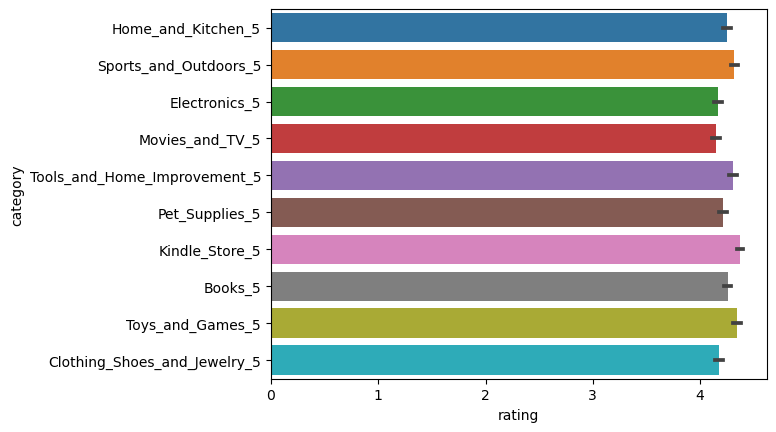

In [200]:
category= Reviews['category']
rating = Reviews['rating']

sns.barplot(y = category, x = rating, data = Reviews)

<Axes: title={'center': 'Bar Chart of category in Reviews Data'}, xlabel='category'>

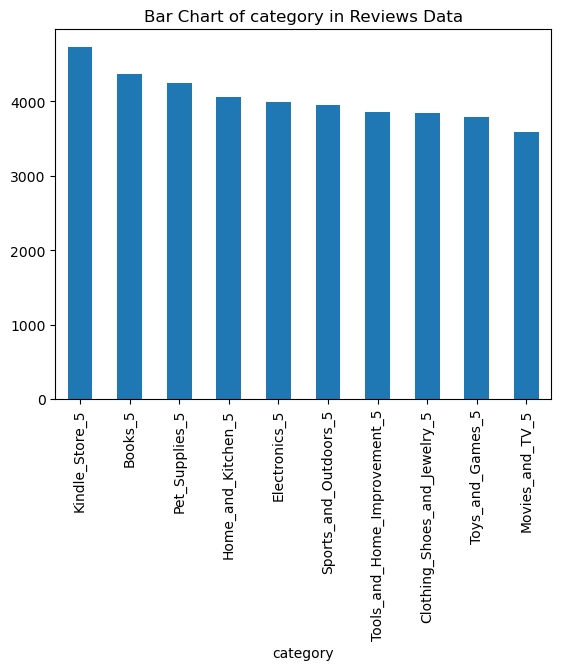

In [201]:
Reviews.category.value_counts().plot.bar(title = 'Bar Chart of category in Reviews Data')

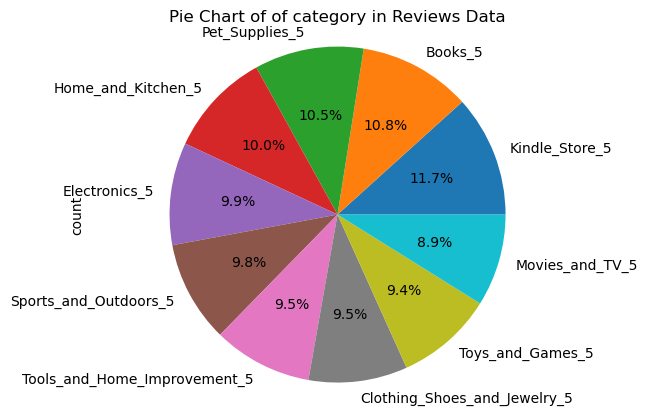

In [202]:
Reviews.category.value_counts().plot.pie(autopct='%1.1f%%',
                                       title = 'Pie Chart of of category in Reviews Data')

plt.axis('equal')
plt.show()